In [10]:
import pickle
from os.path import join
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix


In [23]:
# PLOT
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
with open('../model/LightGBM/model.pickle', 'rb') as handle:
    model = pickle.load(handle)

In [12]:
scaler = model[0]
lgb = model[1]

In [14]:
scaler

StandardScaler()

# Plot the model performance

In [7]:
ls ../data/preprocessed/

X.pk.zip  Y.pk.zip  test.pk.zip


In [8]:
X_training = pd.read_pickle(join("../data/preprocessed/", "X.pk.zip"))
y = pd.read_pickle(join("../data/preprocessed/", "Y.pk.zip"))


In [15]:
data_scaled = scaler.transform(X_training)

/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [17]:
y_pred = lgb.predict(data_scaled)

In [19]:
predicted_vals = [np.argmax(line) for line in y_pred]

In [21]:
cm = confusion_matrix(y, predicted_vals)

In [22]:
cm

array([[  619,    75,  1347],
       [   85,   797,  1953],
       [ 1521,  2871, 61443]])

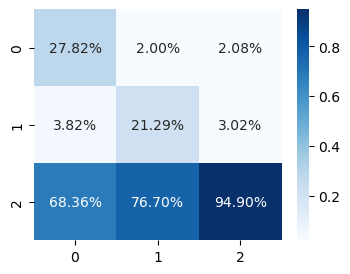

In [24]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm/np.sum(cm, axis=0), annot=True, 
            fmt='.2%', cmap='Blues')
fig.savefig("cm.png")

# Real predictions

In [2]:
X = pd.read_pickle(join("../data/preprocessed/", "test.pk.zip"))
X_mat = X.values

with open('../model/LightGBM/model.pickle', 'rb') as handle:
    model = pickle.load(handle)


In [25]:
da

In [4]:
predicted_vals = lgb.predict(data_sc)

NameError: name 'data_sc' is not defined

In [27]:

ypr = [np.argmax(line) for line in predicted_vals]

In [28]:
np.sum(ypr)

59045

In [29]:

report = pd.DataFrame({'Id': X.index, 'pred': ypr})
report.to_csv("submission.csv", index=False)